# **금융경제학**

- 금융경제학 (박기영 저, 시그마프레스) 교재에 사용된 데이터/모형/그래프 관련 작업을 수행하는 python notebook 파일임: https://github.com/FinancialEconomicsPython
- python 코드는 구글 코랩에서 사용하는 것을 기준으로 작성되었음.
- 데이터 파일이 필요한 경우 위치: https://drive.google.com/drive/folders/1sArqUZKnxWtkNtHe31iD1w-2xCVEhTj0?usp=share_link
- date: 2025/3/22, updated: 2026/2/7

# 사전준비
## 수정이 필요한 부분

- 아래 셀에서 BASE에는 본인의 구글 드라이브 경로, key_api_ECOS에는 본인의 한국은행 ECOS open API key를 입력해야 합니다.
  - 한국은행 ECOS open API key 신청은 다음 링크에서 할 수 있습니다: https://ecos.bok.or.kr/api/#/

- UTILS, FIGS의 경우 BASE에서 지정한 폴더 아래 UTILS, FIGS 폴더를 동일하게 만들고 해당 폴더에 있는 파일들을 저장할 경우 수정할 필요 없습니다.



In [1]:
# ============================
# 🎯 사용자별 맞춤 설정 영역
# ============================

# Google Drive 상 Colab 프로젝트 기본 폴더 경로 (각자 환경에 맞게 수정)
BASE = "/content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics"

# 한국은행 ECOS API 인증키 (개인별 발급)
key_api_ECOS = "YOUR_ECOS_API_KEY_HERE"

if ("YOUR_ECOS_API_KEY_HERE" in key_api_ECOS):
    print("⚠️ ECOS API 인증키가 설정되지 않았습니다.")
    print("   'key_api_ECOS'에 본인의 API 키를 입력한 뒤 다시 실행하세요.")
    raise SystemExit

# 서브폴더 지정 (utils, figures 등)
UTILS = f"{BASE}/utils"
FIGS  = f"{BASE}/figures"

## Preamble 및 필요한 라이브러리/함수 불러오기
- PublicDataReader 라이브러리 불러오기
- utils 폴더에 있는 preamble_core.py 불러오기
  - google drive 연결
  - 출력 DPI 조정
- utils 폴더에 있는 plot_utils.py 불러오기
  - plot_dual_axis를 이용해서 y축 왼쪽, 오른쪽 모두 사용하는 그림 그리기
- koreanize_matplotlib 라이브러리: 그림에서 한글 깨짐 방지

In [2]:
# PublicDataReader 라이브러리 불러오기
!pip -q install publicdatareader
from PublicDataReader import Ecos

# ============================
# 📦 Preamble 불러오기
# ============================

from google.colab import drive
drive.mount("/content/drive", force_remount=True)

import sys, os, importlib
if UTILS not in sys.path:
    sys.path.append(UTILS)

# preamble_core 불러오기
from preamble_core import setup_notebook, bind_env, save_fig

# 노트북 공통 환경 설정
setup_notebook(save_dir=FIGS, seaborn_use=True)
bind_env(globals())   # Colab에서도 plt/np/pd 활성화

# Colab 화면 출력용/파일 저장용 DPI 설정
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 100   # 화면 렌더링
plt.rcParams["savefig.dpi"] = 600  # 파일 저장

# 그래프 그리는 plot_dual_axis() 불러오기
import plot_utils
importlib.reload(plot_utils)
from plot_utils import plot_dual_axis

# koreanize_matplotlib 설치
# 1. 라이브러리 설치 (이미 되어 있다면 생략 가능)
!pip -q install koreanize-matplotlib

# 2. 임포트
import koreanize_matplotlib
import matplotlib.pyplot as plt

Mounted at /content/drive
✅ Notebook environment initialized.
📂 Figures will be saved to: /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures


## NBER recession dates 불러오기
- utils 폴더의 nber_utils를 통해 NBER recession dates 불러오기

✅ nber_utils ready (functions: load_and_process_nber_data, plot_nber_recession)
✅ NBER recession data loaded successfully.
📅 Number of cycles detected: 34
✅ NBER monthly cycles loaded: 34 periods


,peak,trough
26,1969-12-01,1970-11-01
27,1973-11-01,1975-03-01
28,1980-01-01,1980-07-01
29,1981-07-01,1982-11-01
30,1990-07-01,1991-03-01
31,2001-03-01,2001-11-01
32,2007-12-01,2009-06-01
33,2020-02-01,2020-04-01


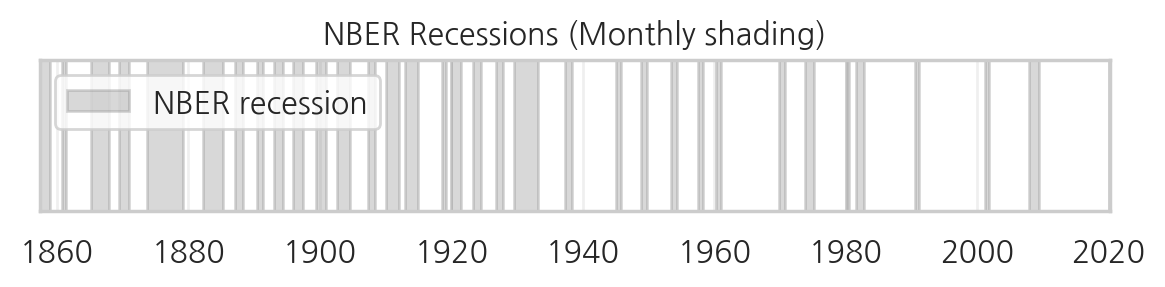

In [3]:
# ============================
# 📊 NBER 경기순환 데이터 로딩
# ============================

import nber_utils

# Colab 전역 네임스페이스에 함수 주입 (load_and_process_nber_data, plot_nber_recession)
if hasattr(nber_utils, "bind_env"):
    nber_utils.bind_env(globals())
else:
    print("⚠️ bind_env() not found in nber_utils (확인 필요).")

# NBER Business Cycle Dating Committee spreadsheet
url = "https://www.nber.org/sites/default/files/2023-03/BCDC_spreadsheet_for_website.xlsx"
NBERm, NBERq = nber_utils.load_and_process_nber_data(url)

print(f"✅ NBER monthly cycles loaded: {len(NBERm)} periods")
display(NBERm.tail(8))

# ============================
# 🖼️ 예시: 경기침체 구간 시각화
# ============================

fig, ax = plt.subplots(figsize=(6, 1.6))
ax.set_xlim(pd.Timestamp("1961-01-01"), pd.Timestamp("2025-12-31"))
ax.set_ylim(0, 1)
ax.set_yticks([])

plot_nber_recession(ax, NBERm, clip_to_xlim=True, keep_xlim=True, label="NBER recession")

ax.set_title("NBER Recessions (Monthly shading)", fontsize=11)
ax.grid(True, alpha=0.3)
ax.legend(loc="upper left")
plt.tight_layout()
plt.show()

# END OF PREAMBLE

# Main

## **내용**
- 분산투자의 효과
- 체계적 위험 vs. 비체계적 위험
- 평균-분산 분석
  - 위험자산 2개인 경우
  - 상관계수와 mv frontier
  - 위험자산 1개, 무위험자산
  - 위험자산 2개, 무위험자산
  - 일반화: 위험자산 N개, 무위험자산

In [4]:
import scipy.optimize as solver
from functools import reduce

## 주가 데이터 불러오기

- Yahoo Finance에서 미국 주식시장 시가총액 상위 50개 기업 월별 주가 불러오기

In [5]:
# ticker list of S&P500 firms
'''
table=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
df = table[0]
tickers = df.Symbol.to_list()
'''

"\ntable=pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')\ndf = table[0]\ntickers = df.Symbol.to_list()\n"

In [6]:
!pip -q install fix-yahoo-finance==0.1.30
!pip -q install yfinance
import yfinance as yf

In [7]:
start = "2014-01-02"
end = '2023-08-31'
tickers = ['AAPL','AMZN','MSFT','META', 'BRK-B','GOOG','GOOGL', 'JNJ','JPM','V',
           'PG','T','UNH','MA','HD','INTC','VZ','KO','BAC','XOM',
           'MRK','DIS','PFE','PEP','CMCSA','CVX','ADBE','CSCO','NVDA','WMT',
           'NFLX','CRM','WFC','MCD','ABT','BMY','COST','BA','C','PM',
           'NEE','MDT','ABBV','PYPL','AMGN','TMO','LLY','HON','ACN','IBM']

df = yf.download(tickers, start, end, interval='1mo')['Close']

# sort columns following the tickers above
df = df[tickers]
df.head(3)

[*********************100%***********************]  50 of 50 completed


Ticker,AAPL,AMZN,MSFT,META,BRK-B,...,TMO,LLY,HON,ACN,IBM
Date,,,,,,,,,,,
2014-02-01,16.323,18.105,31.785,67.985,115.780,...,119.878,47.336,66.211,67.915,109.458
2014-03-01,16.748,16.819,34.264,59.822,124.970,...,115.739,47.165,65.347,64.957,114.409
2014-04-01,18.413,15.207,33.771,59.365,128.850,...,109.863,47.357,65.446,65.364,116.774


In [8]:
# get stock returns from stock prices
df = df.pct_change()*100

# drop out the first line of NaN
df = df.iloc[1:,:]

In [9]:
df.head(3)

Ticker,AAPL,AMZN,MSFT,META,BRK-B,...,TMO,LLY,HON,ACN,IBM
Date,,,,,,,,,,,
2014-03-01,2.606,-7.106,7.798,-12.007,7.937,...,-3.453,-0.363,-1.305,-4.355,4.523
2014-04-01,9.940,-9.585,-1.439,-0.764,3.105,...,-5.077,0.408,0.151,0.627,2.068
2014-05-01,7.272,2.769,1.337,5.888,-0.396,...,2.553,1.286,0.269,2.754,-6.164


## 분산투자의 효과

In [10]:
start = 1
end = df.shape[1]

storage1 = []

for i in range(start, end):

    # increase the number of stocks to be included in the portfolio
    x = df.iloc[:,:i]

    x_mean = x.mean()
    x_cov = x.cov()
    w = np.asarray([1/i]*i)

    pf_return = np.sum(x_mean*w)
    pf_var = np.dot(w, np.dot(x_cov,w))

    stats = [pf_return, pf_var]
    storage1.append(stats)

storage1 = np.array(storage1)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/diversification.png


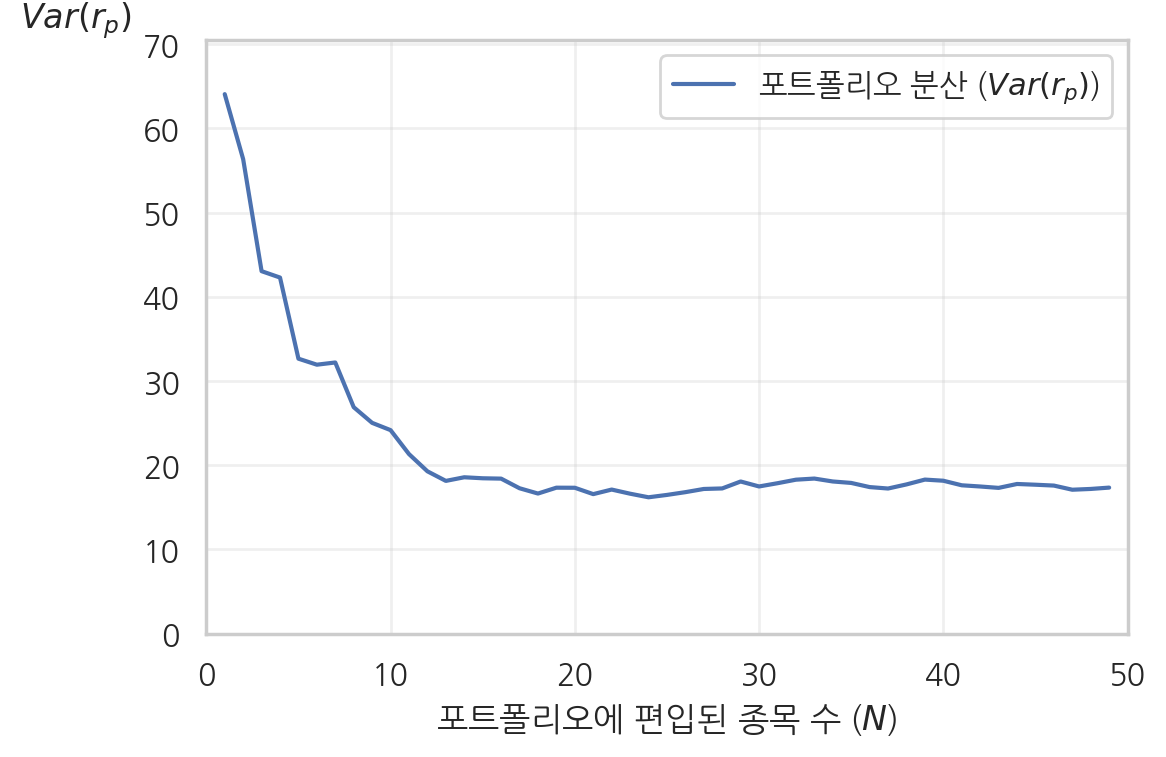

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

ax.plot(range(start,end), storage1[:,1])
ax.set_ylim([0, storage1[:,1].max()*1.1])
ax.set_xlim([0, end])

#ax.set_title('분산투자의 효과', fontsize=14)
ax.set_xlabel('포트폴리오에 편입된 종목 수 ($N$)', fontsize=12)
ax.set_ylabel('$Var(r_{p})$', fontsize=12, loc='top', rotation=0)
ax.legend(['포트폴리오 분산 ($Var(r_{p})$)'], fontsize=11)
ax.grid(True)
save_fig('diversification')

plt.show()

## 분산과 공분산의 분해

In [12]:
storage2 = []

for i in range(start, end):

    x = df.iloc[:,:i]

    x_cov = x.cov()
    x_diag = np.diag(x_cov)
    avg_var = (1/i)*np.mean(x_diag)

    x_offsum = np.sum(np.sum(x_cov)) - np.sum(x_diag)
    avg_covar = (1/(i**2))*x_offsum

    stats = [avg_var, avg_covar]
    storage2.append(stats)


storage2 = np.array(storage2)
storage_all = np.concatenate((storage1, storage2), axis=1)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/decomposition.png


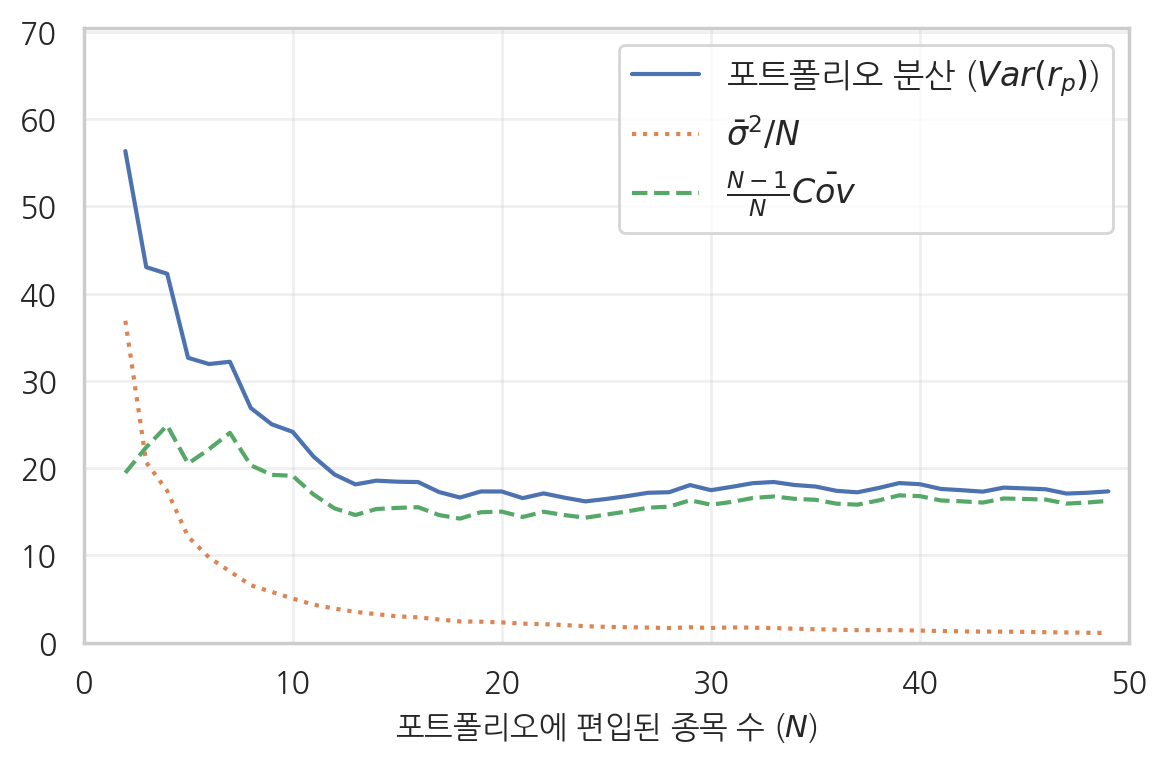

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4))

ax.plot(range(start+1,end), storage_all[1:,1], linestyle='solid')  # start from the 2nd observations for pretty figure
ax.plot(range(start+1,end), storage_all[1:,2], linestyle='dotted')
ax.plot(range(start+1,end), storage_all[1:,3], linestyle='dashed')
ax.set_ylim([0, storage_all[:,1].max()*1.1])
ax.set_xlim([0, end])

#ax.set_title('포트폴리오 분산의 분해', fontsize=12)
ax.set_xlabel('포트폴리오에 편입된 종목 수 ($N$)', fontsize=11)

labels = ['포트폴리오 분산 ($Var(r_{p})$)', r'$\bar{\sigma}^{2}/N$', r'$\frac{N-1}{N}\bar{Cov}$']
ax.legend(labels, fontsize=12)
ax.grid(True)
save_fig('decomposition')

plt.show()

## 평규-분산 분석(Mean-Variance Analysis)
### Case 1: Two-Risky Assets

In [14]:
# expected returns, variances, covariance
# 기대수익률 각각 15%, 8%
# 분산 각각 0.8, 0.4
# 공분산 0.2

E1, E2 = 0.15, 0.08
var1, var2 = 0.8, 0.4
cov12 = 0.2

In [15]:
# for storage
x,y=[],[]

# calculate the minimized standard deviations given the level of expected return
for mu in np.linspace(-0.1,0.4,100):
    w1 = (mu-E2)/(E1-E2)
    w2 = 1- w1
    var = (w1**2)*var1 + (w2**2)*var2 + 2*w1*w2*cov12
    std_dev = np.sqrt(var)
    x.append(std_dev)
    y.append(mu)

# calculate the return and std of min.variance pf
sig_min = min(x)
mu_min = y[np.argmin(x)]

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/two_risky.png


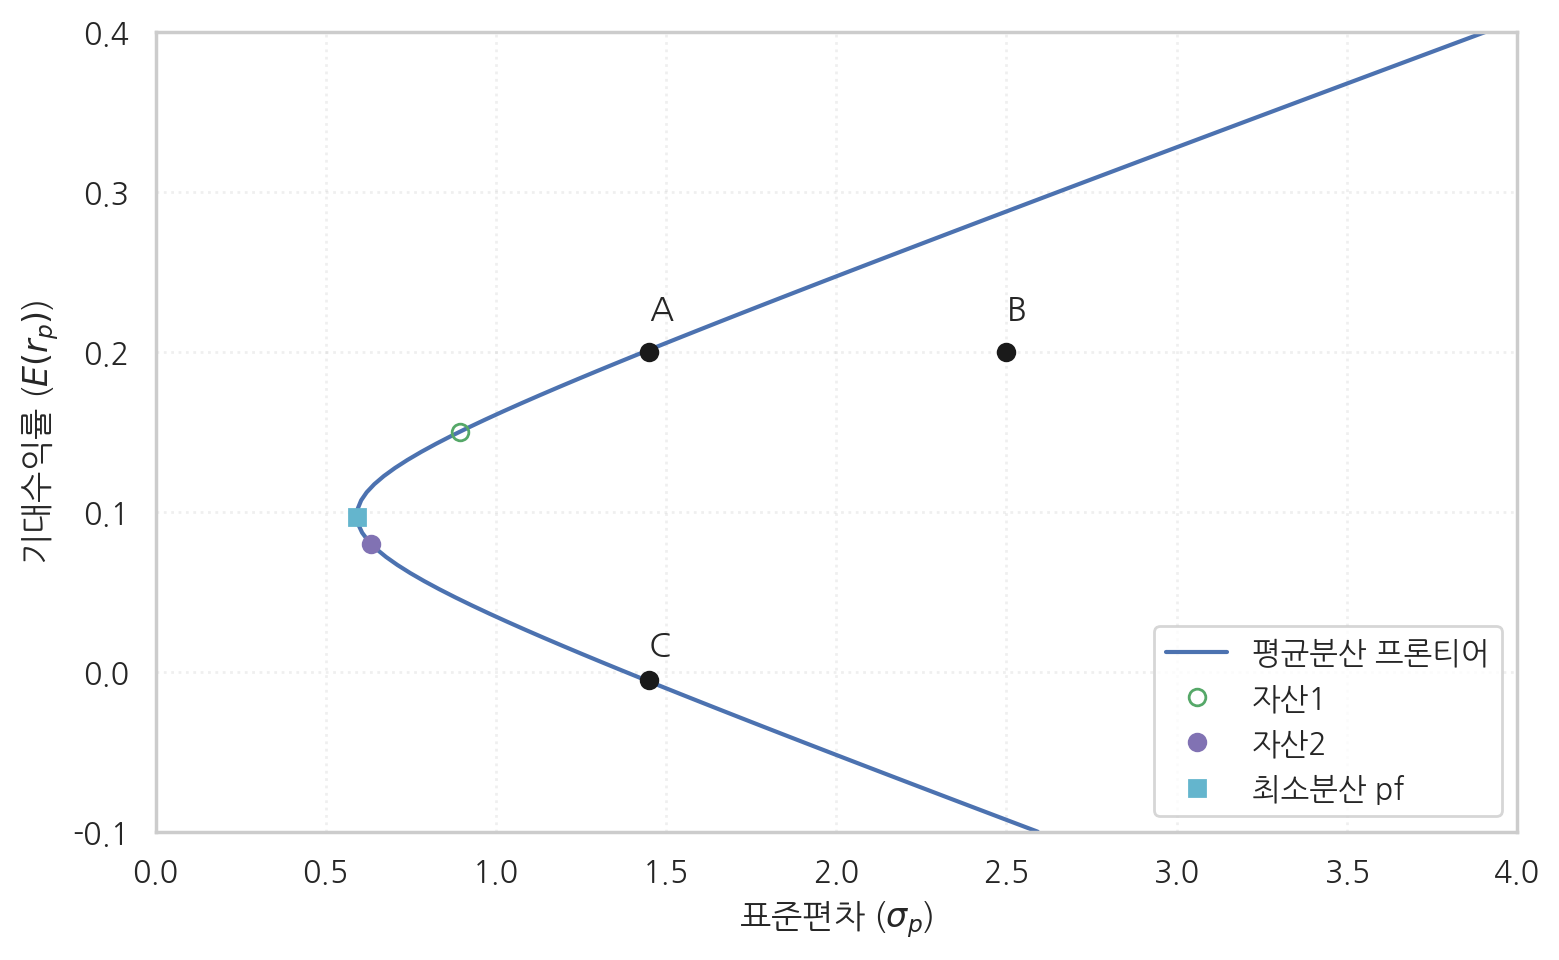

In [16]:
# plot mean-variance frontier
plt.plot(x,y,label='평균분산 프론티어')
plt.plot(np.sqrt(var1),E1,'go',label='자산1', fillstyle='none')
plt.plot(np.sqrt(var2),E2,'mo',label='자산2')
plt.plot(sig_min,mu_min,'cs',label='최소분산 pf')

plt.plot(1.45, 0.2,'ko')
plt.annotate('A',[1.45,0.22])
plt.plot(2.5, 0.2,'ko')
plt.annotate('B',[2.5,0.22])
plt.plot(1.45, -0.005,'ko')
plt.annotate('C',[1.45,0.01])

plt.xlabel('표준편차 ($\sigma_p$)'), plt.ylabel('기대수익률 ($E(r_p )$)')
plt.title('')
plt.grid(linestyle=':')
#plt.grid(False)
plt.legend(loc='lower right')
plt.axis([0, 4, -0.1,0.4])

save_fig('two_risky')

#### 상관계수와 mean-varinace frontier의 형태

In [17]:
# expected returns, variances, covariance
E1, E2 = 0.15, 0.08
var1, var2 = 0.8, 0.4
cov12 = 0.2

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/correlation_mv.png


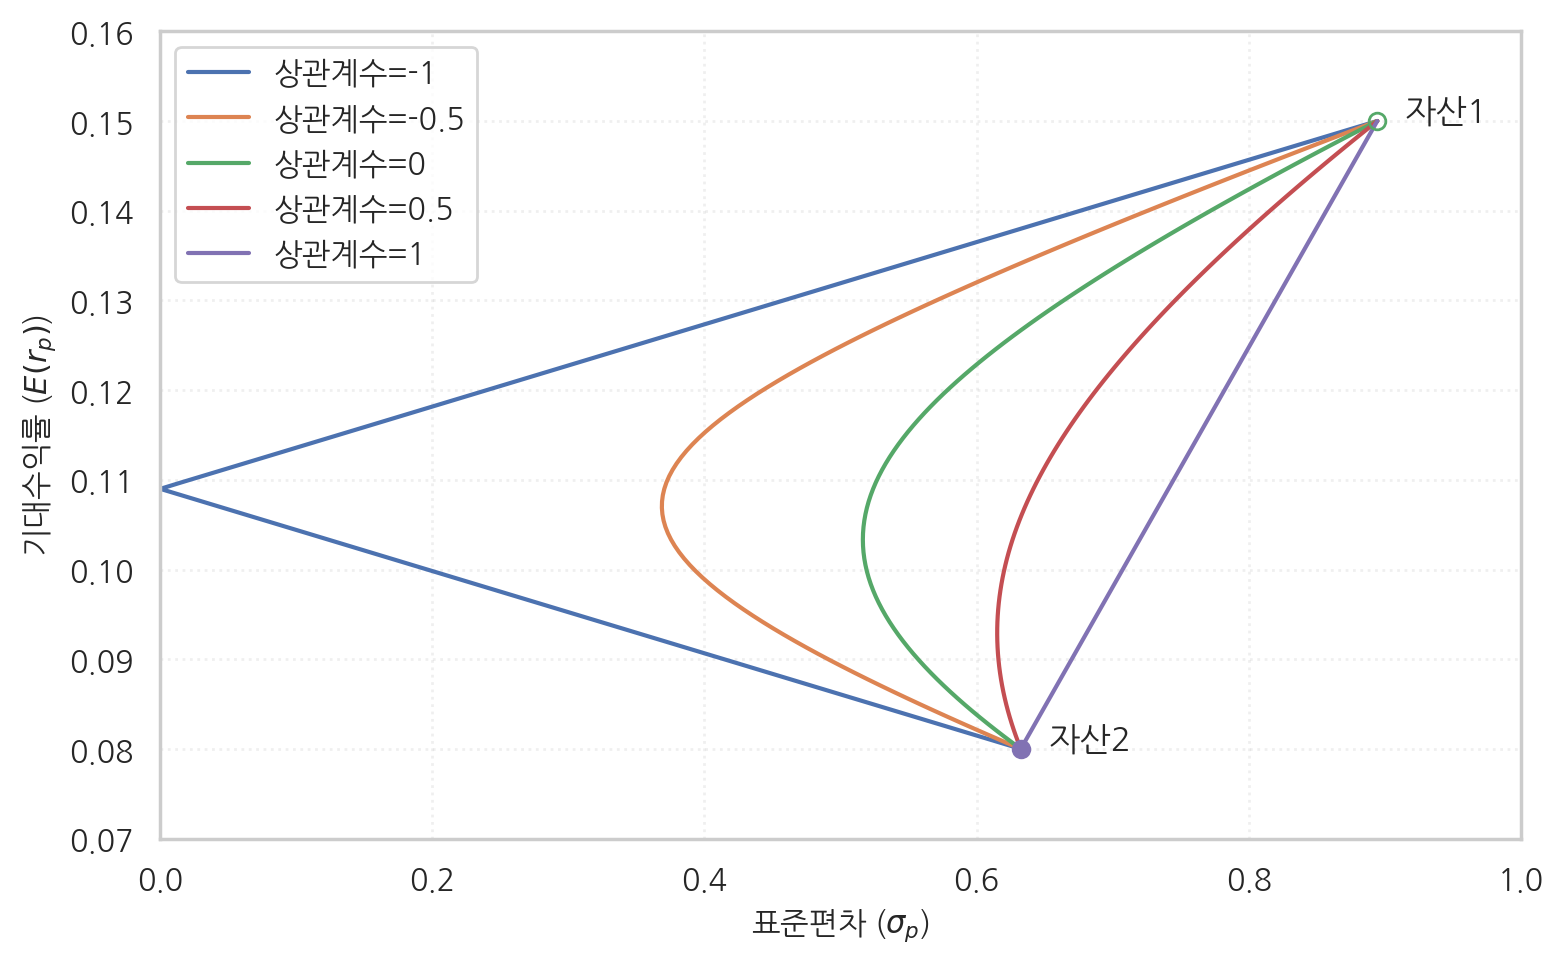

In [18]:
for corr in [-1,-0.5,0,0.5,1]:
    x, y = [],[]
    for w1 in np.linspace(0,1,100):
        w2 = 1 - w1
        mu = w1*E1 + w2*E2
        var = (w1**2)*var1 + (w2**2)*var2 + 2*w1*w2*np.sqrt(var1)*np.sqrt(var2)*corr
        std_dev = np.sqrt(var)
        x.append(std_dev)
        y.append(mu)
    plt.plot(x,y,label=f'상관계수={corr}')

plt.xlabel('표준편차 ($\sigma_p$)', fontsize=11)
plt.ylabel('기대수익률 ($E(r_p )$)',fontsize=11)
plt.title('')
plt.grid(linestyle=':')
plt.legend()
plt.axis([0, 1, 0.07, 0.16])
plt.plot(np.sqrt(var1),E1,'go', fillstyle='none')
plt.plot(np.sqrt(var2),E2,'mo')
plt.annotate('자산1', [np.sqrt(var1)+0.02,E1])
plt.annotate('자산2', xy=[np.sqrt(var2)+0.02,E2])

save_fig('correlation_mv')

### Case 2: 1-Risky & 1-Riskfree

In [19]:
# expected returns, variances, covariance
# 무위험이자율 4% 가정

E1 = 0.15
var1 = 0.8
rf = 0.04

In [20]:
# for storage
x1,y1=[],[]

# plot m-v frontier
for mu in np.linspace(-0.1,0.4,100):
    w1 = (mu-rf)/(E1-rf)
    var = (w1**2)*var1
    std_dev = np.sqrt(var)
    x1.append(std_dev)
    y1.append(mu)

# calculate the return and std of min.variance pf
sig_min = min(x1)
mu_min = y[np.argmin(x1)]

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/one_risky.png


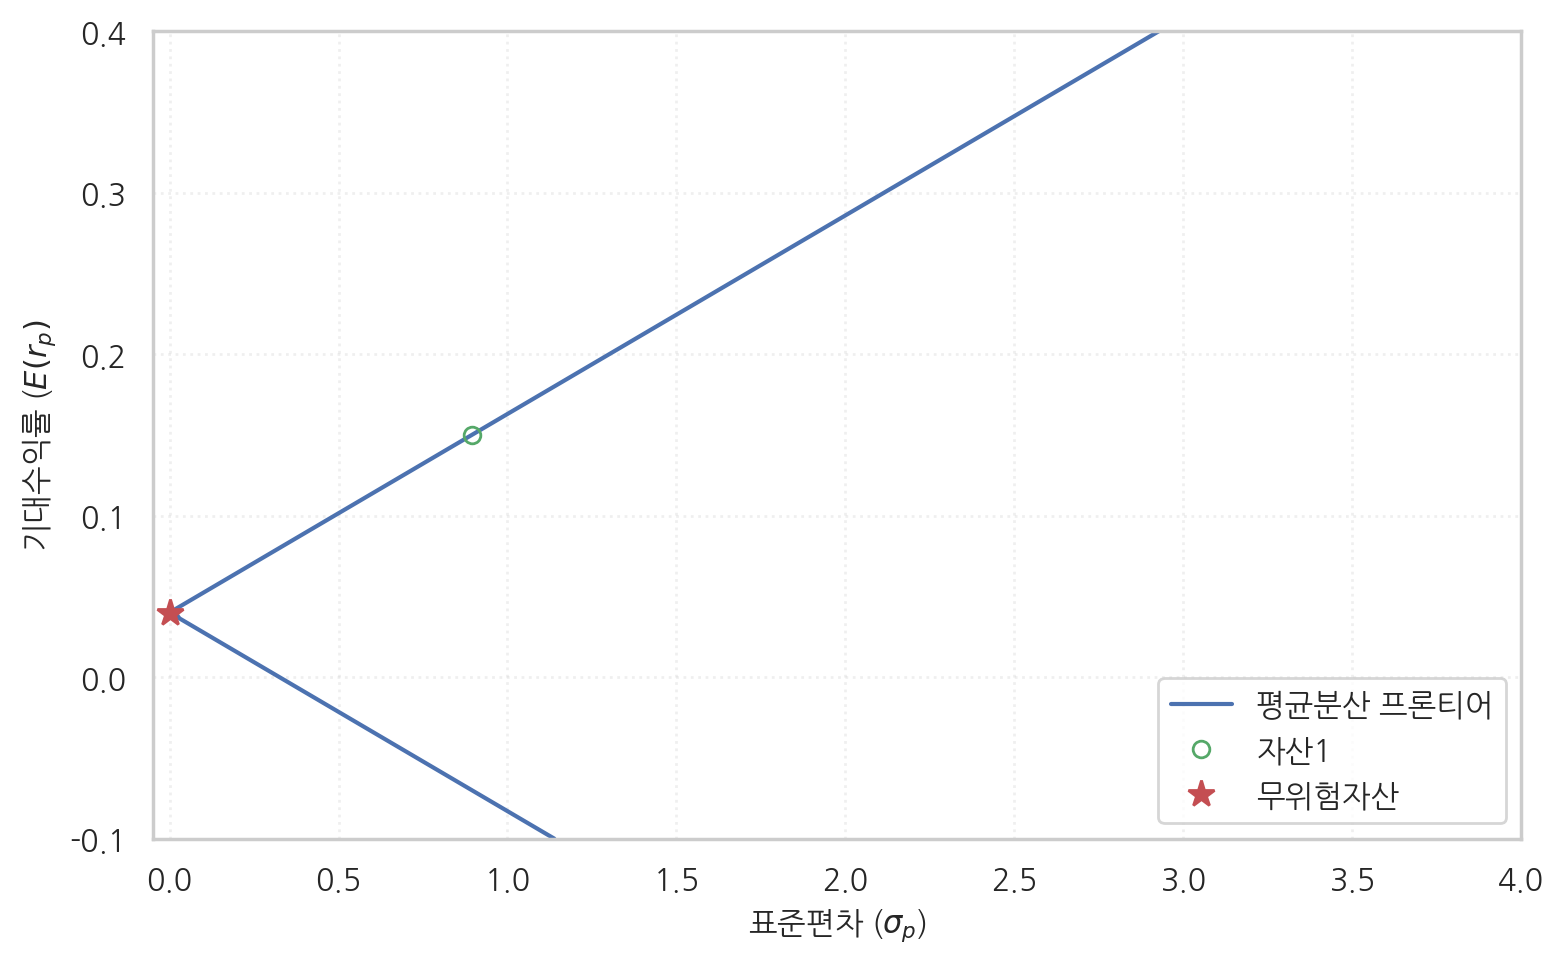

In [21]:
# plot mean-variance frontier
plt.plot(x1,y1,label='평균분산 프론티어')
plt.plot(np.sqrt(var1),E1,'go',label='자산1', fillstyle='none')
plt.plot(0,rf,'r*',label='무위험자산',markersize=10)

plt.xlabel('표준편차 ($\sigma_p$)',fontsize=11)
plt.ylabel('기대수익률 ($E(r_p )$',fontsize=11)
plt.title('')
plt.grid(linestyle=':')
plt.legend(loc='lower right')
plt.axis([-0.05, 4, -0.1,0.4])

save_fig('one_risky')

### Case 3: 2-Risky & 1-Riskfree

In [22]:
# expected returns, variances, covariance

E1, E2 = 0.15, 0.08
var1, var2 = 0.8, 0.4
cov12 = 0.2
rf = 0.04

In [23]:
# for storage
x,y, SR =[],[],[]

# plot m-v frontier
for mu in np.linspace(-0.1,0.4,100):
    w1 = (mu-E2)/(E1-E2)
    w2 = 1- w1
    var = (w1**2)*var1 + (w2**2)*var2 + 2*w1*w2*cov12
    std_dev = np.sqrt(var)
    Sharpe = (mu-rf)/std_dev
    x.append(std_dev)
    y.append(mu)
    SR.append(Sharpe)

# calculate the return and std of min.variance pf
sig_min = min(x)
mu_min = y[np.argmin(x)]

# locate the tangency portfolio and its weight
sig_t = x[np.argmax(SR)]
mu_t = y[np.argmax(SR)]
w_1t = (mu_t-E2)/(E1-E2)

In [24]:
print('Mean return and std of tangency pf is {:.3f} and {:.3f}'.format(mu_t, sig_t))

Mean return and std of tangency pf is 0.137 and 0.781


In [25]:
print('pf weight of tangency pf: w1 = {:.2f} and w2={:.2f}'.format(w_1t,1-w_1t))

pf weight of tangency pf: w1 = 0.82 and w2=0.18


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/2risky1riskfree.png


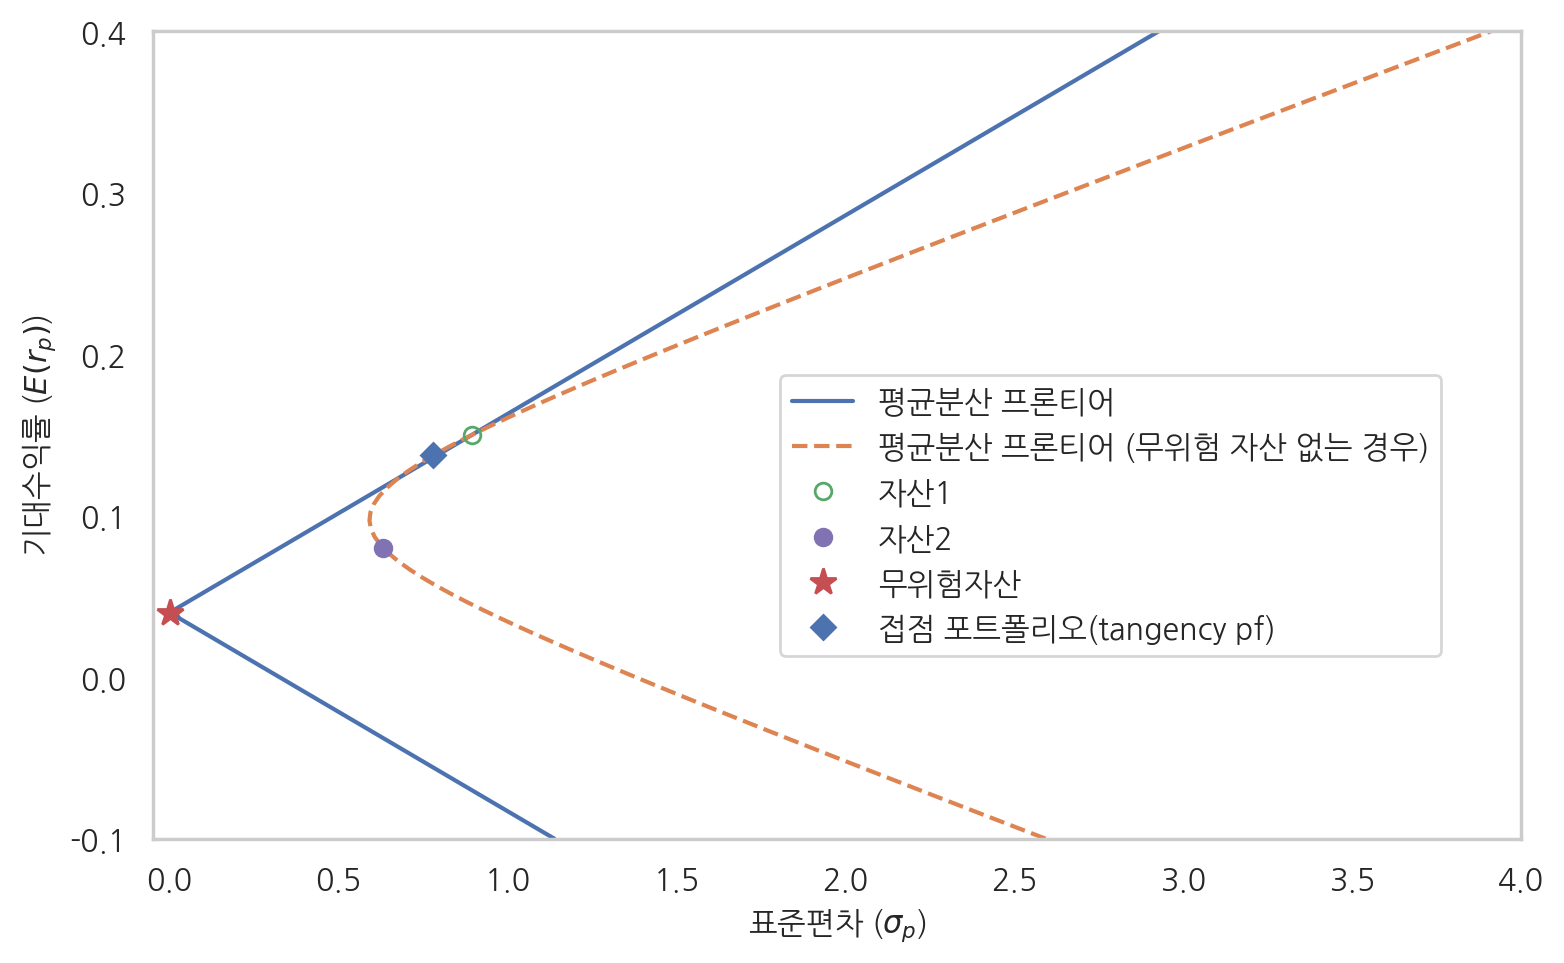

In [26]:
# mean-variance frontier with 2 risky and 1 riskfree asset
plt.plot(x1,y1, label='평균분산 프론티어')
plt.plot(x,y,label='평균분산 프론티어 (무위험 자산 없는 경우)',linestyle='--')

plt.plot(np.sqrt(var1),E1,'go',label='자산1', fillstyle='none')
plt.plot(np.sqrt(var2),E2,'mo',label='자산2')
plt.plot(0,rf,'r*',label='무위험자산',markersize=10)
plt.plot(sig_t, mu_t, 'bD',label='접점 포트폴리오(tangency pf)')

plt.xlabel('표준편차 ($\sigma_p$)',fontsize=11), plt.ylabel('기대수익률 ($E(r_p )$)',fontsize=11)
plt.title('')
plt.grid(False)
#plt.grid(linestyle=':')
plt.legend(loc='center', bbox_to_anchor=(0.7,0.4))
plt.axis([-0.05, 4, -0.1,0.4])

save_fig('2risky1riskfree')

### Case 4: N-Risky

- N = 5: Microsoft, Apple, Amazon, Facebook, Google

주가 데이터 불러오기

- Yahoo Finance에서 미국 주식시장 Microsoft, Apple, Amazon, Facebook, Google 주가 불러오기

In [27]:
start = '2015-01-01'
end = '2021-06-30'

#  import monthly stock prices of Microsoft, Apple, Amazon, Facebook, Google
tickers = ['MSFT','AAPL','AMZN','META','GOOG']

df = yf.download(tickers,start,end,interval='1mo')['Close']

# sort columns following the tickers above
df = df[tickers]
df.head()

[*********************100%***********************]  5 of 5 completed


Ticker,MSFT,AAPL,AMZN,META,GOOG
Date,,,,,
2015-01-01,34.437,25.973,17.726,75.383,26.454
2015-02-01,37.378,28.479,19.008,78.422,27.636
2015-03-01,34.905,27.694,18.605,81.650,27.122
2015-04-01,41.756,27.854,21.089,78.224,26.667
2015-05-01,40.228,28.996,21.462,78.641,26.407


In [28]:
# make df as monthly data
df = df.resample('M').mean()
print(df.head(3))
df.tail(3)

Ticker       MSFT   AAPL   AMZN   META   GOOG
Date                                         
2015-01-31 34.437 25.973 17.726 75.383 26.454
2015-02-28 37.378 28.479 19.008 78.422 27.636
2015-03-31 34.905 27.694 18.605 81.650 27.122


Ticker,MSFT,AAPL,AMZN,META,GOOG
Date,,,,,
2021-04-30,242.534,128.161,173.371,322.825,119.609
2021-05-31,240.130,121.483,161.154,326.450,119.680
2021-06-30,261.140,133.750,172.008,345.298,124.383


In [29]:
# get stock returns from stock prices
df = df.pct_change()*100

# drop out the first line of NaN
returns = df.iloc[1:,:]

print(returns.head(3))
print('\n')
print(returns.tail(3))

Ticker       MSFT   AAPL   AMZN   META   GOOG
Date                                         
2015-02-28  8.540  9.645  7.229  4.031  4.468
2015-03-31 -6.615 -2.755 -2.120  4.115 -1.862
2015-04-30 19.626  0.579 13.351 -4.196 -1.676


Ticker       MSFT   AAPL   AMZN   META   GOOG
Date                                         
2021-04-30  6.960  7.622 12.066 10.372 16.508
2021-05-31 -0.991 -5.211 -7.047  1.123  0.060
2021-06-30  8.749 10.098  6.735  5.774  3.929


In [30]:
# generate lots of arbitrary pf weights and locate the corresponding returns and std's

np.random.seed(123)

# number of pf weights
num_pfs = 5000

x_mean = returns.mean()
x_cov = returns.cov()
x_std = returns.std()
n = len(x_mean)

storage = []

for i in range(num_pfs):
    # get portfolio weights
    weights = np.random.random(n)
    weights = weights/np.sum(weights)

    # average returns, standard deviations and Sharpe ratio
    pf_return = np.sum(x_mean*weights)
    pf_var = np.dot(weights, np.dot(x_cov,weights))
    pf_std = np.sqrt(pf_var)
    pf_SR = (pf_return - rf)/pf_std

    stats = [pf_return, pf_std, pf_SR]
    storage.append(stats)

storage = np.array(storage)

In [31]:
# m-v frontier: by minimizing portfolio variance

def sd(w):
    return np.sqrt(reduce(np.dot, [w, x_cov, w.T]))

# define initial values: start from 1/n
w0 = np.array([1.0 / n for x in range(n)])

# constraints for weights: for convenience, w is confined within [-1,1]
bounds = tuple((-2, 2) for x in range(n))

given_r = np.arange(0.5, 5.5, .01)
storage_E = []
pf_w = []

for i in given_r:
    constraints = [{'type': 'eq', 'fun': lambda w: sum(w) - 1},
                   {'type': 'eq', 'fun': lambda w: sum(w * x_mean) - i}]
    outcome = solver.minimize(sd, x0=w0, constraints=constraints, bounds=bounds, method='SLSQP')
    std = outcome.fun
    SR = (i-rf)/std
    storage_E.append([i,std,SR])
    pf_w.append(outcome.x)

storage_E = np.array(storage_E)
stds = storage_E[:,1]
pf_w = np.array(pf_w)

In [32]:
# check the optimization result
outcome

     message: Optimization terminated successfully
     success: True
      status: 0
         fun: 18.00173339528778
           x: [ 2.000e+00 -3.987e-01  2.000e+00 -6.013e-01 -2.000e+00]
         nit: 4
         jac: [ 3.620e+00  1.676e+00  5.854e+00  2.945e-01  5.047e-02]
        nfev: 24
        njev: 4
 multipliers: [-1.447e+01  6.493e+00]

In [33]:
# return and std of tangency porfolio
r_t = storage_E[storage_E[:,2].argmax()][0]
s_t = storage_E[storage_E[:,2].argmax()][1]
SR_t = storage_E[storage_E[:,2].argmax()][2]

print('tangency pf: average return = {:.3f}, std = {:.3f}, SR_t = {:.3f}'.format(r_t, s_t, SR_t))

tangency pf: average return = 2.820, std = 5.658, SR_t = 0.491


Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Nrisky.png


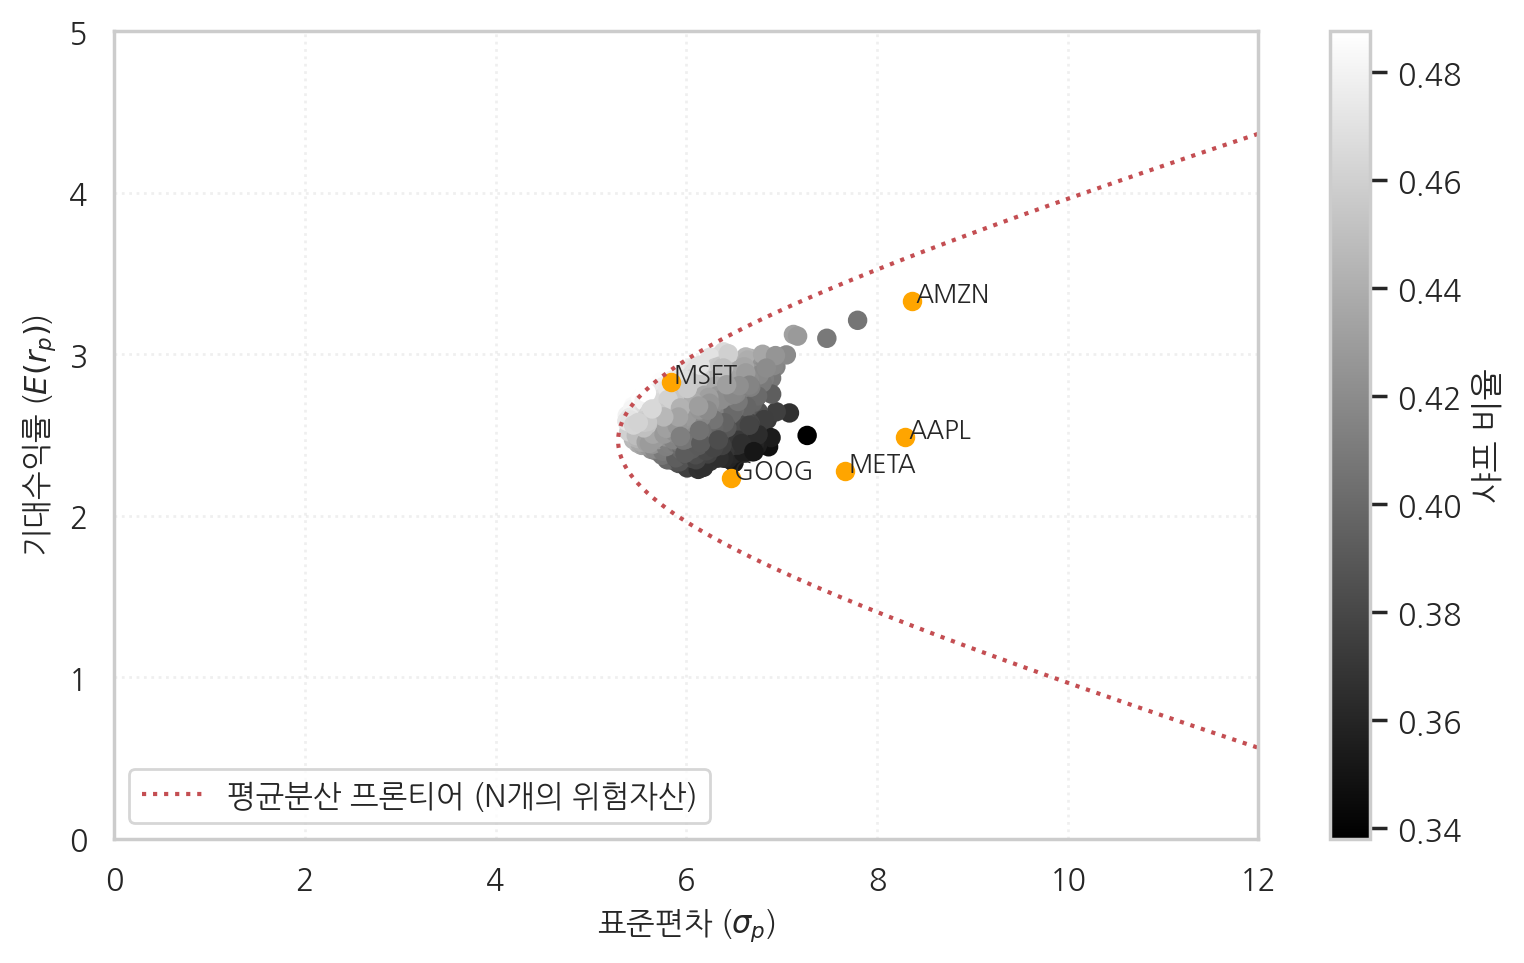

In [34]:
#plt.figure(figsize=(12,8))
plt.scatter(storage[:,1], storage[:,0], c=storage[:,2], cmap='gray')
plt.colorbar(label='샤프 비율')
plt.xlabel('표준편차 ($\sigma_p$)', fontsize=11)
plt.ylabel('기대수익률 ($E(r_p )$)', fontsize=11)

for (i,x) in enumerate(returns.columns):
    plt.scatter(x_std[i], x_mean[i], c='orange')
    plt.annotate(str(x), xy=[x_std[i]+0.03,x_mean[i]], fontsize=9)

plt.plot(stds, given_r, 'r:', label = '평균분산 프론티어 (N개의 위험자산)')

plt.axis([0,12,0,5])
plt.grid(linestyle=':')
plt.legend(loc='lower left')

save_fig('Nrisky')

### Case 5: N-Risky and 1-Riskfree

In [35]:
# as a proxy for riskfree rate, we import 3-month US Treasury rate from FRED (https://fred.stlouisfed.org)
var_list = ['GS3M']
df_rf = pdr.get_data_fred(var_list, start, end)
df_rf.head(3)

,GS3M
DATE,
2015-01-01,0.030
2015-02-01,0.020
2015-03-01,0.030


In [36]:
rfree = df_rf.mean().squeeze()
print("Now, riskfree rate is {:.3f}%".format(float(rfree)))

Now, riskfree rate is 0.890%


In [37]:
# m-v frontier: by minimizing portfolio variance
# alternatively, you can just draw the line connecting riskfree rate and tangency pf
# note: wSw(w) is pf std, not variance

def wSw(w):
    return np.sqrt(reduce(np.dot, [w, x_cov, w.T]))

# define initial values: start from 1/n
w0 = np.array([1.0 / n for x in range(n)])

# constraints for weights: for convenience, w is confined within [-1,1]
bounds = tuple((-2, 2) for x in range(n))

given_r = np.arange(0.5, 5.5, .01)
storage_E1 = []
pf_w1 = []

for i in given_r:
    constraints = [{'type': 'eq', 'fun': lambda w: sum(w * (x_mean-rfree)) + rfree - i}]
    outcome = solver.minimize(wSw, x0=w0, constraints=constraints, bounds=bounds, method='SLSQP')
    std = outcome.fun
    SR = (i-rfree)/std
    storage_E1.append([i,std,SR])
    pf_w1.append(outcome.x)

    #stds_rf.append(outcome.fun)  # save the minimized variance for each r's
storage_E1 = np.array(storage_E1)
pf_w1 = np.array(pf_w1)

Saving figure → /content/drive/MyDrive/Colab Notebooks/book_FinancialEconomics/figures/Nrisky1riskfree.png


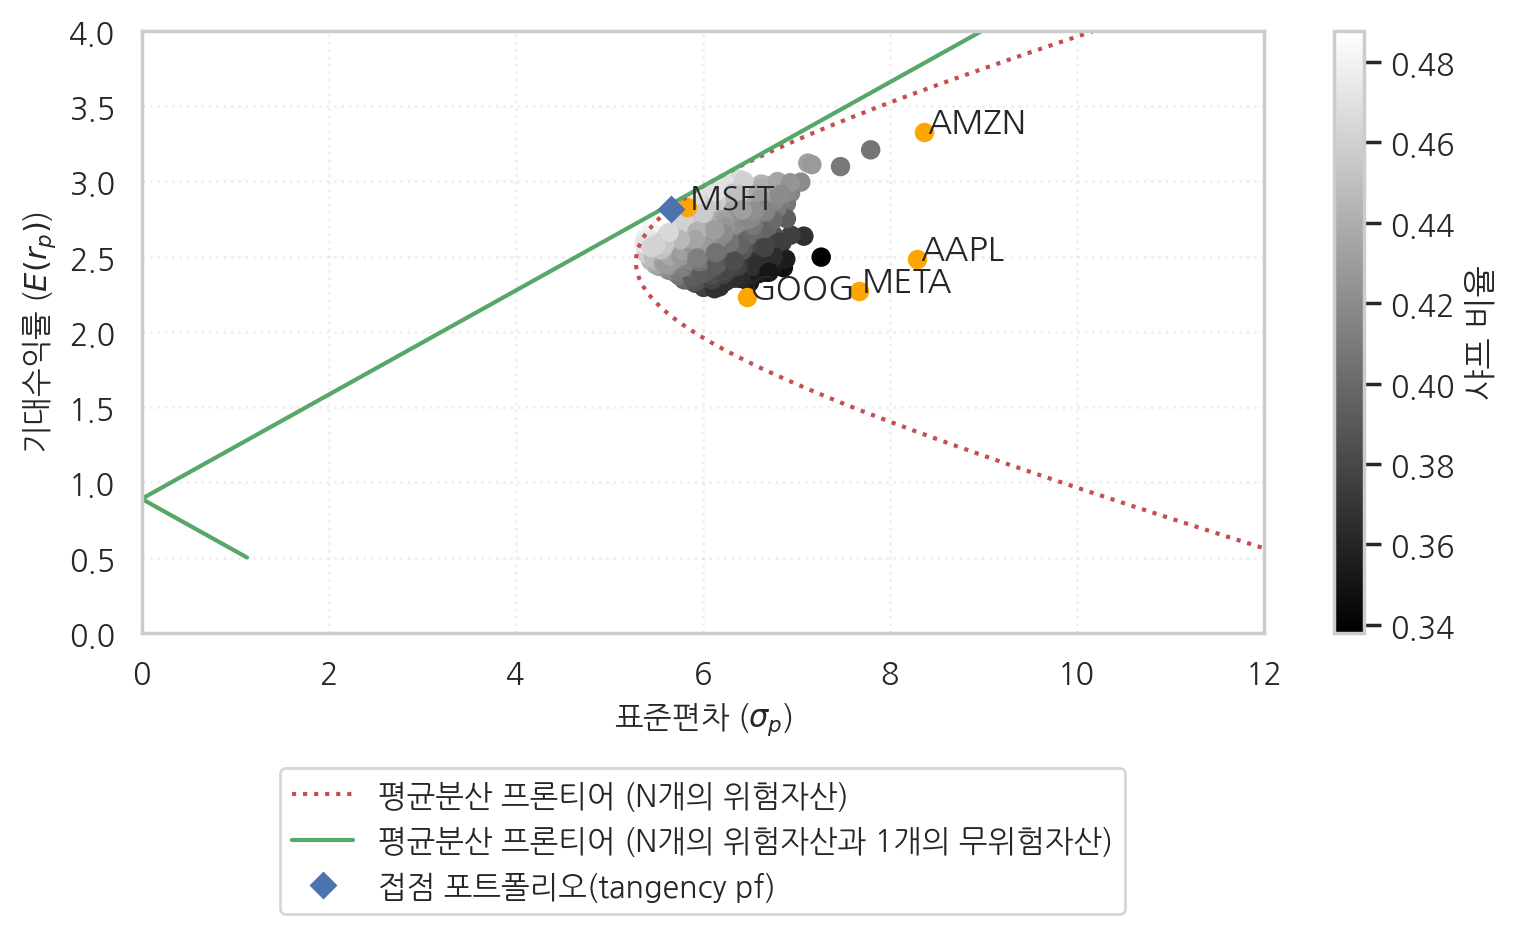

In [38]:
#plt.figure(figsize=(12,8))
plt.scatter(storage[:,1], storage[:,0], c=storage[:,2], cmap='gray')
plt.colorbar(label='샤프 비율')
plt.xlabel('표준편차 ($\sigma_p$)',fontsize=11)
plt.ylabel('기대수익률 ($E(r_p )$)',fontsize=11)

for (i,x) in enumerate(returns.columns):
    plt.scatter(x_std[i], x_mean[i], c='orange')
    plt.annotate(str(x), xy=[x_std[i]+0.03,x_mean[i]])

# m-v frontier of N-risky assets
plt.plot(stds, given_r, 'r:', label = '평균분산 프론티어 (N개의 위험자산)')

# m-v frontier of N-risky and 1-riskfree
plt.plot(storage_E1[:,1], given_r, 'g', label = '평균분산 프론티어 (N개의 위험자산과 1개의 무위험자산)')

# return and std of tangency pf
plt.plot(s_t, r_t, 'bD', label = '접점 포트폴리오(tangency pf)')

plt.axis([0,12,0,4])
plt.grid(linestyle=':')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2))

save_fig('Nrisky1riskfree')